In [75]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "cmr10"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [4, 3] 
#Set the width of 2 plots next to each other to 4.77
plt.rcParams["axes.labelsize"] = 9
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.rcParams["lines.markersize"] = 3
plt.rcParams["axes.labelpad"] = 2

import Qubits

In [79]:
res_array = np.arange(5, 80, 2)
interations = 50

5.3*0.9, 4/5.3

(4.77, 0.7547169811320755)

### The convergence of the Transmon eigenvalues in the flux basis

In [95]:
E0 = []
E1 = []
E2 = []
E3 = []
tF = []

for i in range(len(res_array)):
    transmonF = Qubits.transmon_flux(res_array[i], 0.02, 1, 0) #parameters (n, EC, EJ, ng)

    t = timeit.timeit(stmt=transmonF.solve, number=interations)
    tF.append((t/interations)*1000)#I multiply by 1000 to get the result in milliseconds
    transmonF.solve()
    energies = transmonF.eigvals

    E0.append(energies[0])
    E1.append(energies[1])
    E2.append(energies[2])
    E3.append(energies[3])


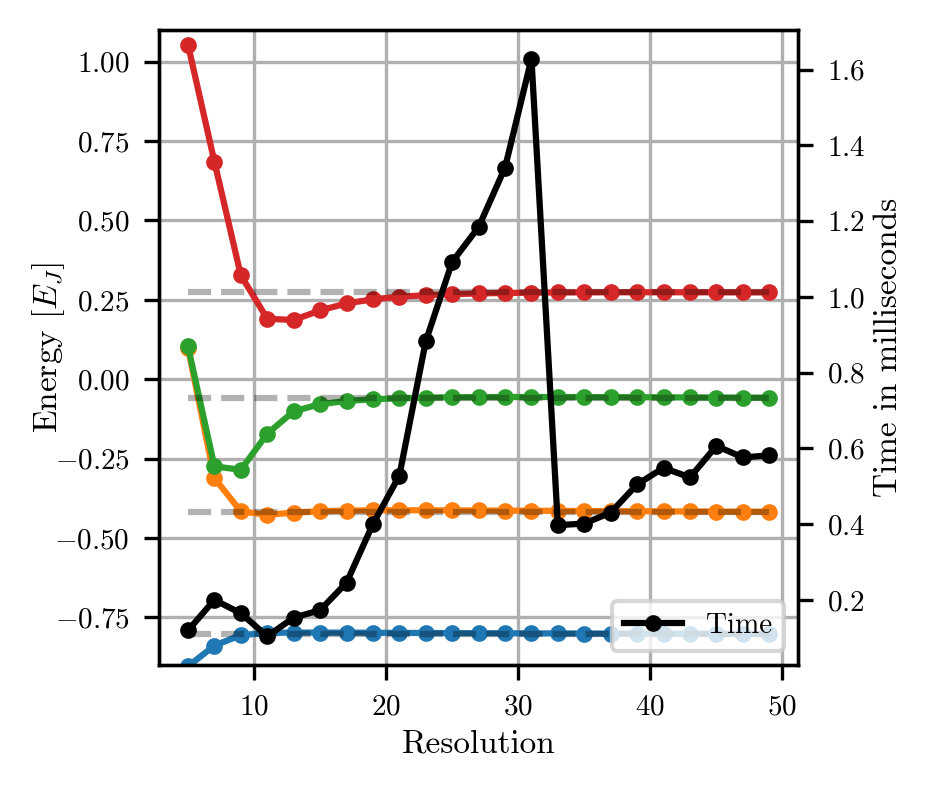

In [96]:
fig, ax1 = plt.subplots(figsize=(2.75, 2.75))

ax1.plot(res_array, E0, '-o')
ax1.plot([res_array[0], res_array[-1]], [E0[-1], E0[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E1, '-o')
ax1.plot([res_array[0], res_array[-1]], [E1[-1], E1[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E2, '-o')
ax1.plot([res_array[0], res_array[-1]], [E2[-1], E2[-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, E3, '-o')
ax1.plot([res_array[0], res_array[-1]], [E3[-1], E3[-1]], '--', color="black", alpha=0.3)
ax1.set(xlabel = "Resolution")
ax1.set_ylabel(r"Energy [$E_J$]", labelpad=-3)
#title = "Convergence of transmon in flux basis"
ax1.grid()
ax1.set(ylim=(-0.9,1.1))

ax2 = ax1.twinx()

ax2.plot(res_array, tF, '-o', color = "black", label = "Time", markersize = 3)
ax2.set(ylabel="Time in milliseconds")
ax2.legend(loc = "lower right")
#fig.tight_layout()

In [86]:
print(E0[-1], E1[-1], E2[-1], E3[-1])

-0.8016795100312433 -0.41720606765865775 -0.05805639507215787 0.27346106906448037


So from this we can see that even a resolution of around 50 is plenty to get a consistent result for the lowest couple of eigenvalues

### The convergence of the Transmon eigenvalues in the charge basis

In [87]:
E0 = []
E1 = []
E2 = []
E3 = []
tC = []

for i in range(len(res_array)):
    transmonC = Qubits.transmon_charge(res_array[i], 0.02, 1, 0) #parameters (n, EC, EJ, ng)
    
    t = timeit.timeit(stmt=transmonC.solve, number=interations)
    tC.append((t/interations)*1000)#I multiply by 1000 to get the result in milliseconds
    transmonC.solve()
    energies = transmonC.eigvals

    E0.append(energies[0])
    E1.append(energies[1])
    E2.append(energies[2])
    E3.append(energies[3])

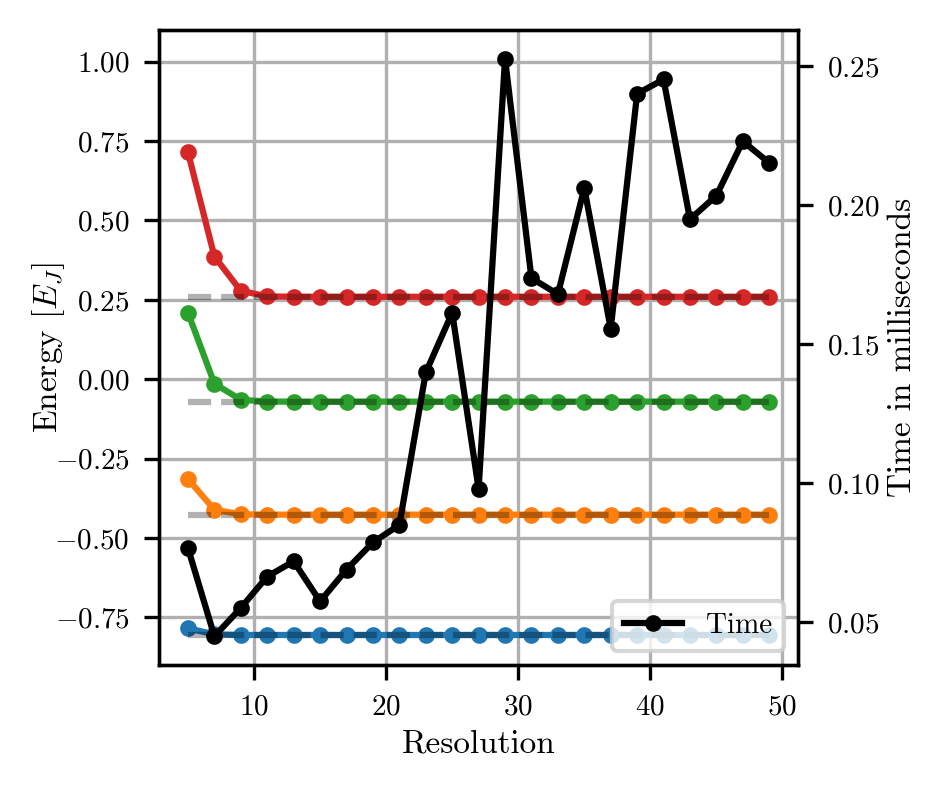

In [88]:
fig, ax3 = plt.subplots(figsize = (2.75,2.75))

ax3.plot(res_array, E0, '-o', markersize = 3)
ax3.plot([res_array[0], res_array[-1]], [E0[-1], E0[-1]], '--', color="black", alpha=0.3)
ax3.plot(res_array, E1, '-o', markersize = 3)
ax3.plot([res_array[0], res_array[-1]], [E1[-1], E1[-1]], '--', color="black", alpha=0.3)
ax3.plot(res_array, E2, '-o', markersize = 3)
ax3.plot([res_array[0], res_array[-1]], [E2[-1], E2[-1]], '--', color="black", alpha=0.3)
ax3.plot(res_array, E3, '-o', markersize = 3)
ax3.plot([res_array[0], res_array[-1]], [E3[-1], E3[-1]], '--', color="black", alpha=0.3)
ax3.set(xlabel = "Resolution")
ax3.set_ylabel(r"Energy [$E_J$]", labelpad=-3)
#title = "Convergence of transmon in charge basis"
ax3.grid()
ax3.set(ylim=(-0.9,1.1))

ax4 = ax3.twinx()

ax4.plot(res_array, tC, '-o', color = "black", label = "Time", markersize = 3)
ax4.set(xlabel = "Resolution", ylabel="Time in milliseconds")
ax4.legend(loc = "lower right")

In [8]:
print(E0[-1], E1[-1], E2[-1], E3[-1])

-0.8051355796936833 -0.4262979938133146 -0.07041883053242741 0.2592815888865294


Here it's clear that the charge basis is much more effective for calculating the eigenvalues compared to the flux basis

### Convergence of the Gatemon energies

In [50]:
T = 0.8
ng = 0.5
beta = 5


gatemonC = Qubits.gatemon_charge(20, 1*T/(4*beta), 1, T, ng)#(N, EC, gap, T, ng)
gatemonF = Qubits.gatemon_flux(20, 1*T/(4*beta), 1, T, ng)#(N, EC, gap, T, ng)
#gatemonF.beenakker = True

energy_charge_basis = np.zeros((4, len(res_array)))
energy_flux_basis = np.zeros((4, len(res_array)))


for i in range(len(res_array)):
    gatemonC.set_resolution(res_array[i])
    gatemonF.set_resolution(res_array[i])

    gatemonC.solve()
    gatemonF.solve()

    energy_charge_basis[:,i] = gatemonC.eigvals[:4]
    energy_flux_basis[:,i] = gatemonF.eigvals[:4]



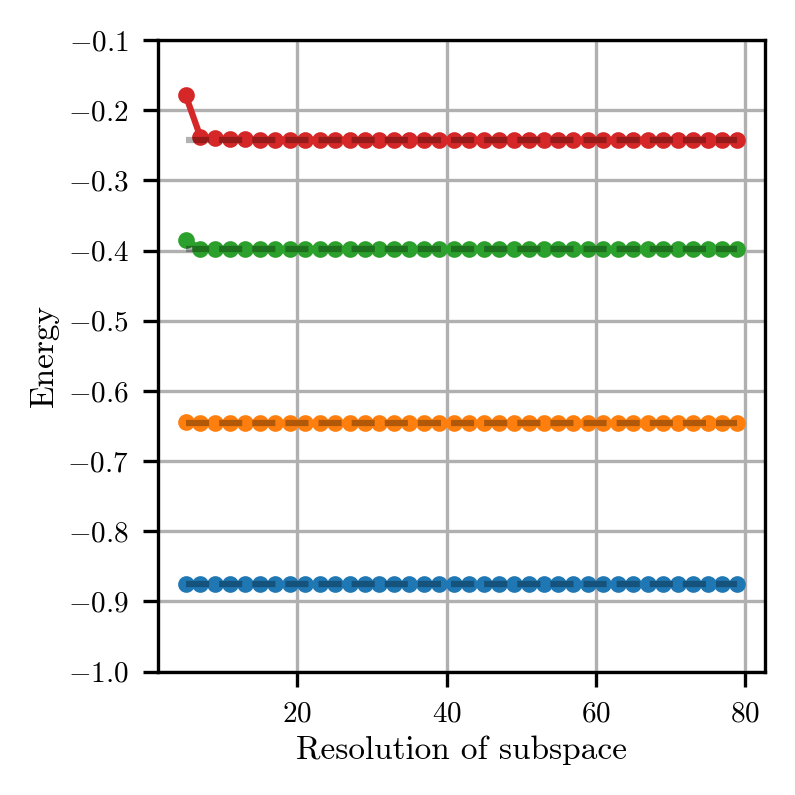

In [51]:
fig, (ax1) = plt.subplots(figsize = (2.75,2.75))
ax1.plot(res_array, energy_charge_basis[0], '-o', markersize = 3)
ax1.plot([res_array[0], res_array[-1]], [energy_charge_basis[0,-1], energy_charge_basis[0,-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, energy_charge_basis[1], '-o', markersize = 3)
ax1.plot([res_array[0], res_array[-1]], [energy_charge_basis[1,-1], energy_charge_basis[1,-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, energy_charge_basis[2], '-o', markersize = 3)
ax1.plot([res_array[0], res_array[-1]], [energy_charge_basis[2,-1], energy_charge_basis[2,-1]], '--', color="black", alpha=0.3)
ax1.plot(res_array, energy_charge_basis[3], '-o', markersize = 3)
ax1.plot([res_array[0], res_array[-1]], [energy_charge_basis[3,-1], energy_charge_basis[3,-1]], '--', color="black", alpha=0.3)
ax1.set(xlabel = "Resolution of subspace", ylabel = "Energy")
#title = "Convergence of gatemon in charge basis"
ax1.grid()
ax1.set(ylim=(-1,-0.1))
fig.tight_layout()

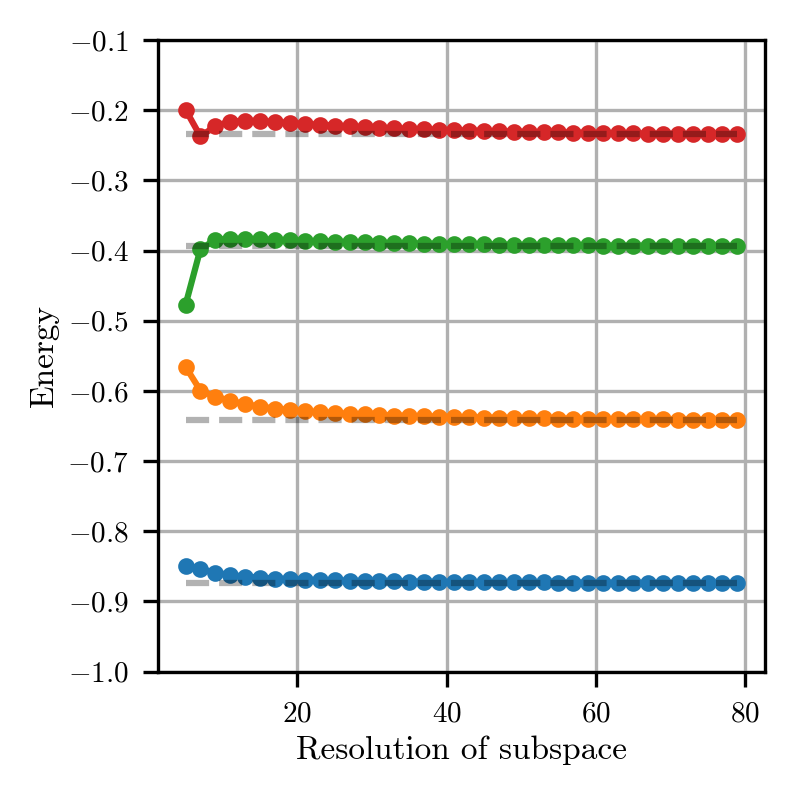

In [52]:
fig, (ax2) = plt.subplots(figsize = (2.75,2.75))

ax2.plot(res_array, energy_flux_basis[0], '-o', markersize = 3)
ax2.plot([res_array[0], res_array[-1]], [energy_flux_basis[0,-1], energy_flux_basis[0,-1]], '--', color="black", alpha=0.3)
ax2.plot(res_array, energy_flux_basis[1], '-o', markersize = 3)
ax2.plot([res_array[0], res_array[-1]], [energy_flux_basis[1,-1], energy_flux_basis[1,-1]], '--', color="black", alpha=0.3)
ax2.plot(res_array, energy_flux_basis[2], '-o', markersize = 3)
ax2.plot([res_array[0], res_array[-1]], [energy_flux_basis[2,-1], energy_flux_basis[2,-1]], '--', color="black", alpha=0.3)
ax2.plot(res_array, energy_flux_basis[3], '-o', markersize = 3)
ax2.plot([res_array[0], res_array[-1]], [energy_flux_basis[3,-1], energy_flux_basis[3,-1]], '--', color="black", alpha=0.3)
ax2.set(xlabel = "Resolution of subspace", ylabel = "Energy")
#title = "Convergence of gatemon in flux basis"
ax2.grid()
ax2.set(ylim=(-1,-0.1))
fig.tight_layout()